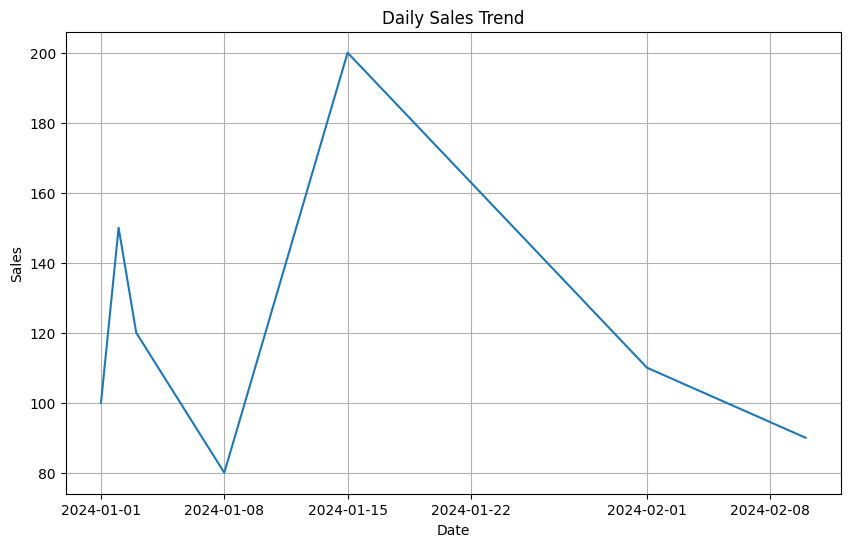

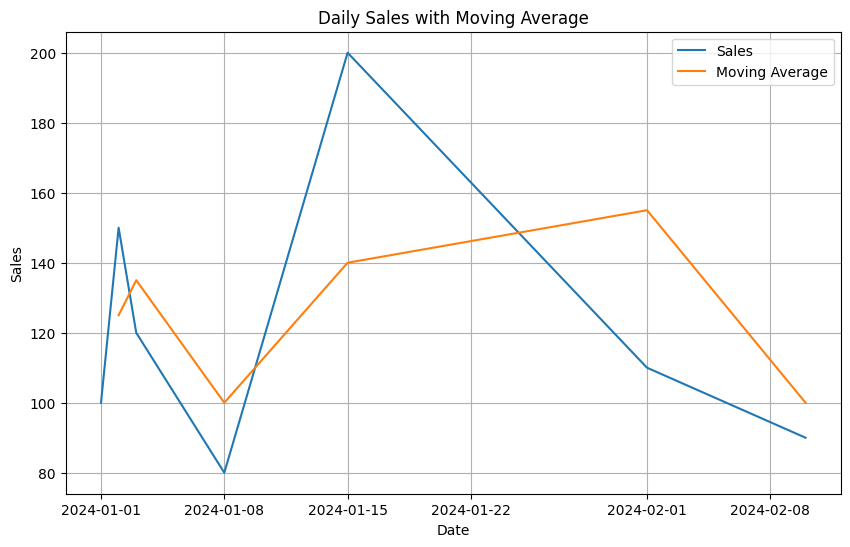

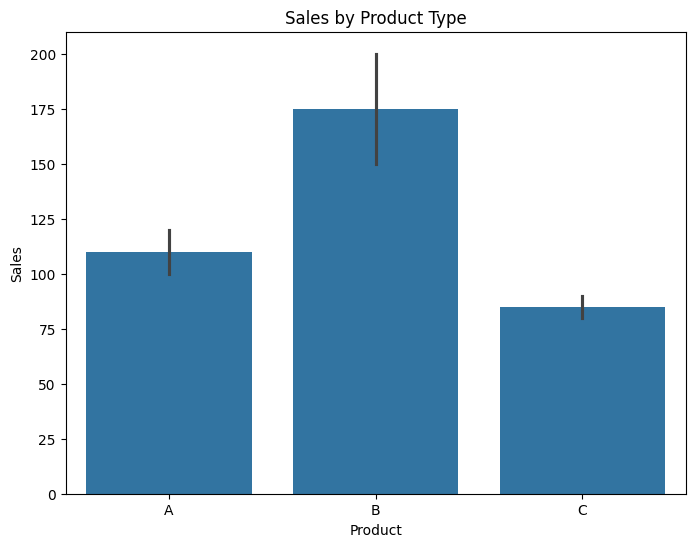

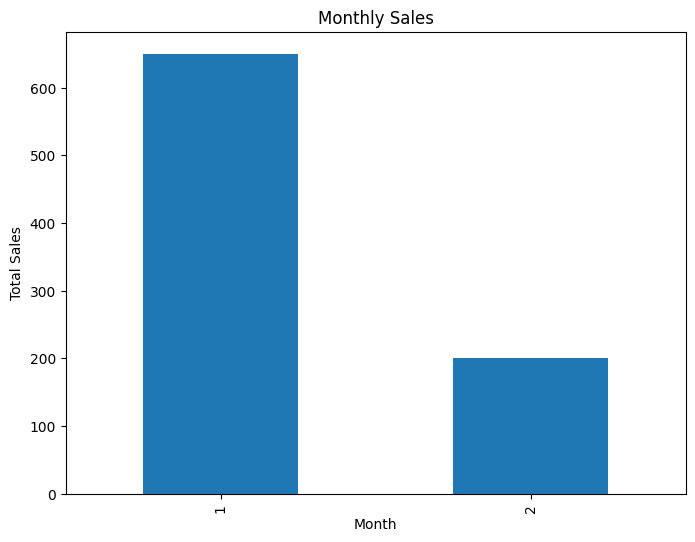

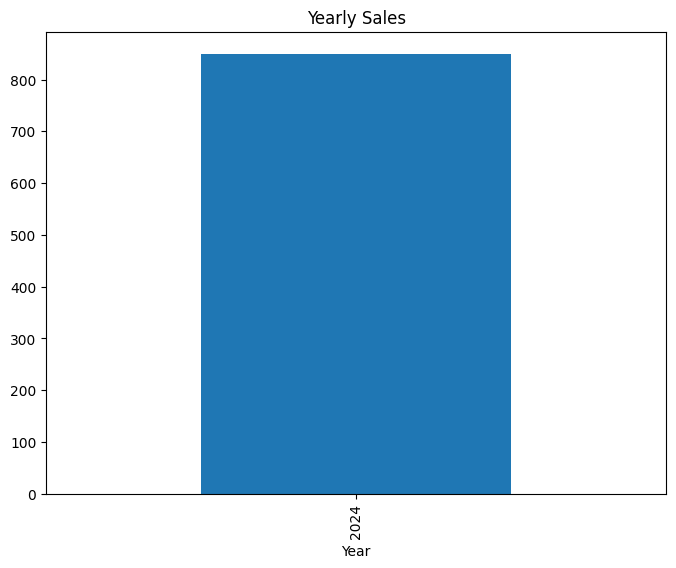

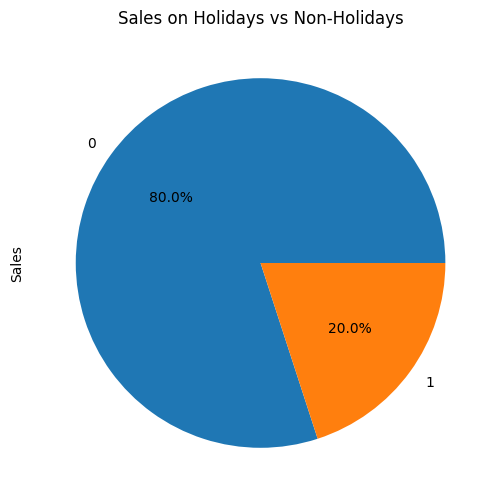

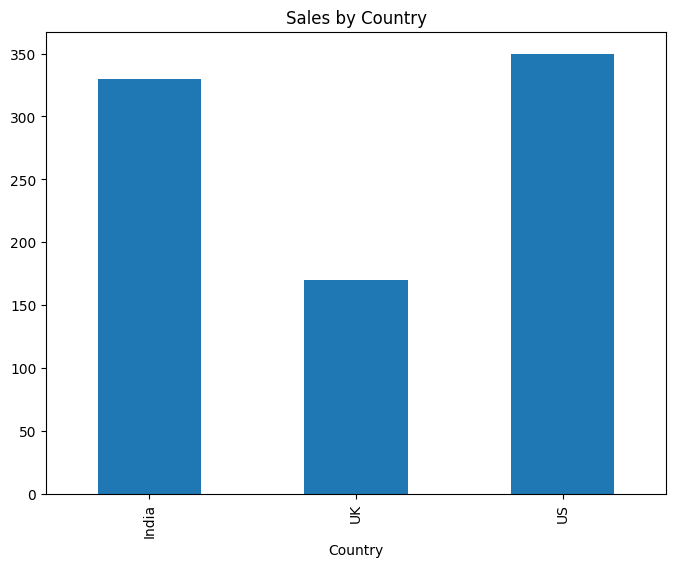

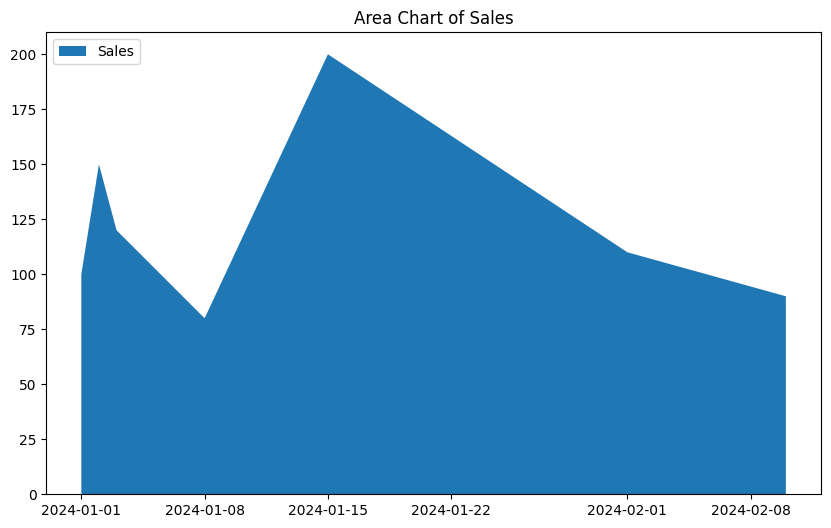

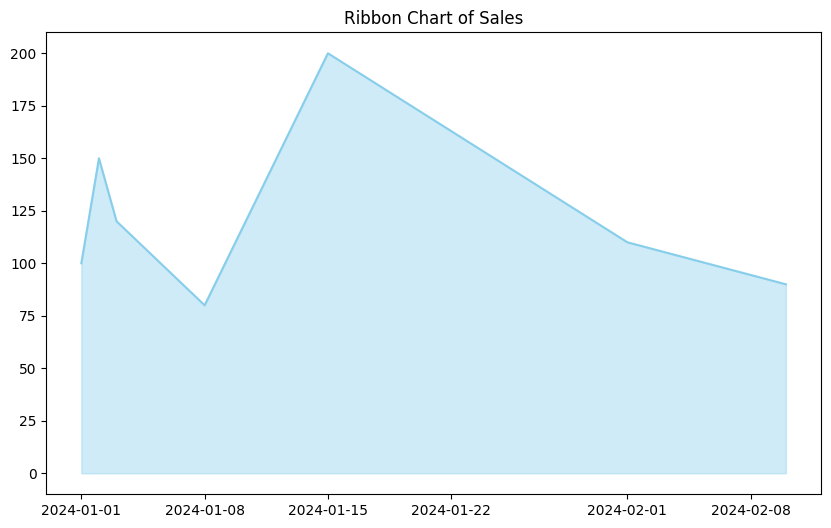

In [13]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


data = {
    'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-08', '2024-01-15', '2024-02-01', '2024-02-10']),
    'Product': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
    'Sales': [100, 150, 120, 80, 200, 110, 90],
    'Country': ['India', 'US', 'India', 'UK', 'US', 'India', 'UK'],
    'City': ['Mumbai', 'New York', 'Delhi', 'London', 'Los Angeles', 'Chennai', 'London'],
    'Holiday': [0, 0, 0, 1, 0, 0, 1] #0 for non holiday, 1 for holiday

}
df = pd.DataFrame(data)

# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6


# Daily Sales Analysis
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.show()

#Moving Average
df['MovingAverage'] = df['Sales'].rolling(window=2).mean() # Change window size as needed

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], label="Sales")
plt.plot(df['Date'], df['MovingAverage'], label='Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

#Sales by Product Type
plt.figure(figsize=(8,6))
sns.barplot(x='Product', y='Sales', data=df)
plt.title('Sales by Product Type')
plt.show()


# Sales by Month
monthly_sales = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Sales by Year
yearly_sales = df.groupby('Year')['Sales'].sum()
plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='bar')
plt.title('Yearly Sales')
plt.show()


# Sales on Holidays vs. Non-Holidays
holiday_sales = df.groupby('Holiday')['Sales'].sum()
plt.figure(figsize=(6, 6))
holiday_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales on Holidays vs Non-Holidays')
plt.show()

# Sales by Country
country_sales = df.groupby('Country')['Sales'].sum()
plt.figure(figsize=(8, 6))
country_sales.plot(kind='bar')
plt.title('Sales by Country')
plt.show()

# Interactive Visualization with Plotly
fig = px.scatter(df, x='Date', y='Sales', color='Product', hover_data=['Country', 'City'], title='Interactive Sales Data')
fig.show()


#Further analysis on other charts based on data (example area and ribbon charts with limited features as example)

# Area chart
plt.figure(figsize=(10,6))
plt.stackplot(df['Date'], df['Sales'], labels=['Sales'])
plt.title("Area Chart of Sales")
plt.legend(loc='upper left')
plt.show()

#Ribbon chart (using fill_between for a simplified ribbon effect)
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Sales'], color='skyblue')
plt.fill_between(df['Date'], df['Sales'], color='skyblue', alpha=0.4)
plt.title('Ribbon Chart of Sales')
plt.show()

